# Polinomio de interpolación de Lagrange

## Soporte teórico

En general, cuando queremos resolver un problema, tendremos una serie de datos puntuales (por ejemplo, el número de infectados por COVID día a día). Para trabajar matemáticamente con esos datos necesitamos definir una función a partir de ellos y, después, trabajar con esa función (por ejemplo, derivarla, para conocer la tendencia de la curva, o integrarla, para conocer el número de personas afectadas, *etc.*). Por lo tanto, conseguir crear una función que aproxime un conjunto de datos es una parte fundamental del trabajo práctico de un matemático. Hay varias formas de hacer esto. Ahora vamos a ver la más sencilla de todas: **el polinomio de interpolación de Lagrage**.

En este caso, si tenemos $n+1$ puntos construiremos un polinomio de orden $n$ que pase por esos puntos. Pensemos que es algo que ya hemos hecho en el instituto... pero restringido a un caso concreto: si nos dan 2 puntos sabemos (ejem...) construir una recta (es decir, un polinomio de orden 1) que pase por esos 2 puntos. Ahora vamos a aprender a hacer esto para más puntos.

Primero necesitamos un teorema que nos garantice la existencia de ese polinomio:

**Teorema (de interpolación de Lagrange):**
Dados
* $n+1$ puntos distintos, $x_0,x_1,\ldots,x_n$;
* $n+1$ valores cualesquiera, $y_0,y_1,\ldots,y_n$;
existe un único  polinomio $p_n$ de grado {$\leq n$} tal que 

$$
p_n(x_i)=y_i \, , \quad\forall i=0,1,2,\ldots,n \, .
$$

Este polinomio $p_n$ se denomina **polinomio de interpolación de Lagrange en los puntos $x_0,x_1,\ldots,x_n$ 
relativo a los valores $y_0,y_1,\ldots,y_n$**. 

En particular, si $y_i=f(x_i)$, decimos que **$p_n$ es el polinomio de interpolación de Lagrange de la 
función $f$ en los puntos $x_i$**.

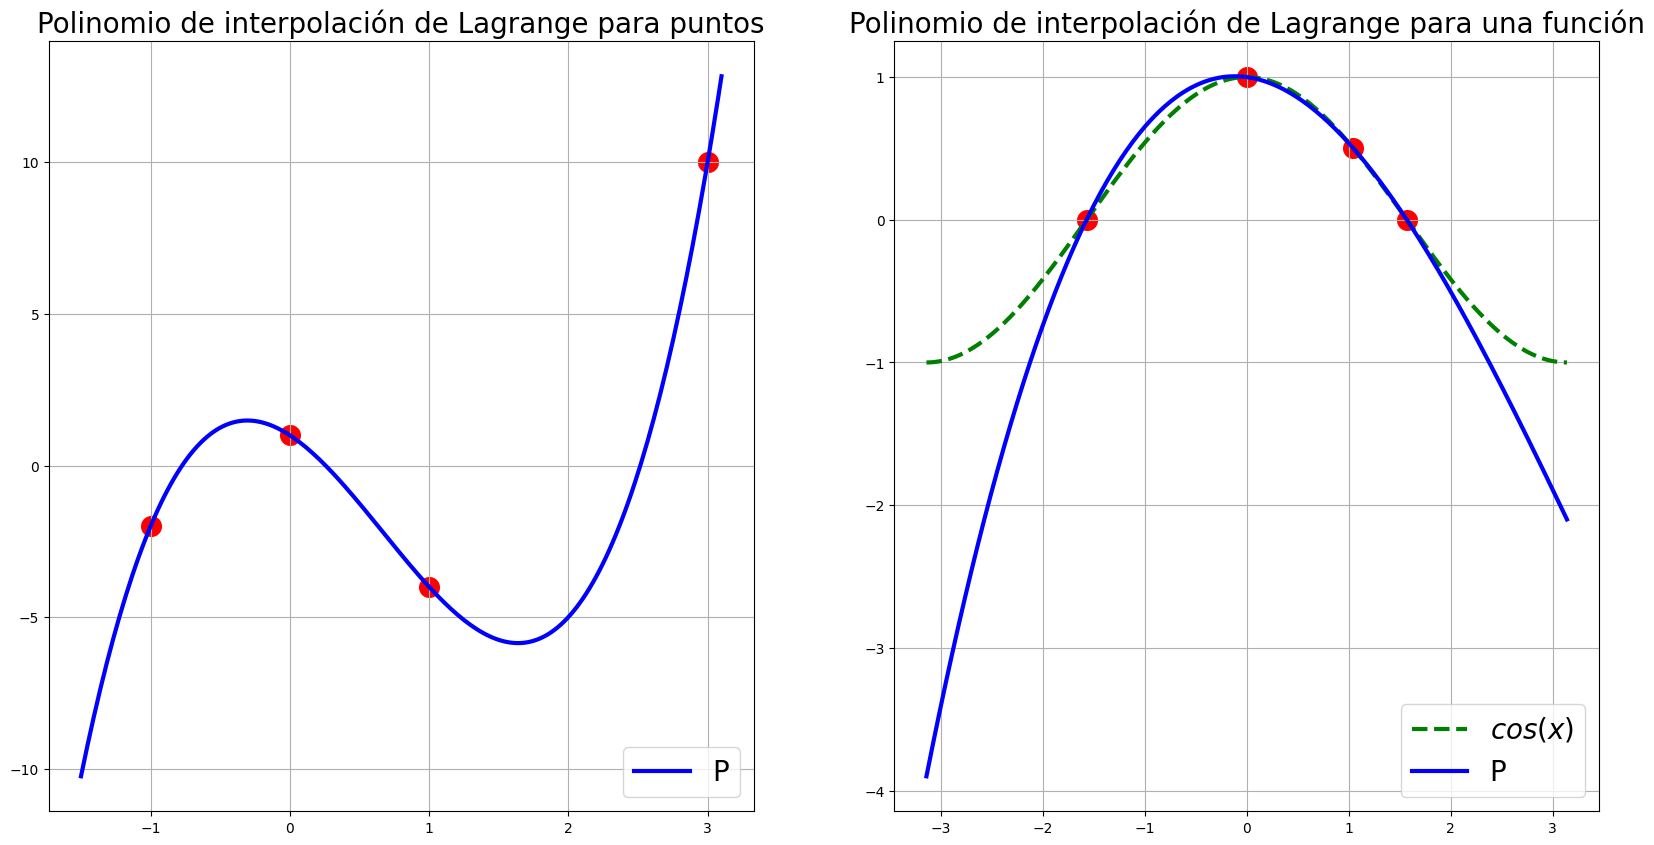

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Figura izquierda
ax1 = axs[0]
x_coef = np.array([-1, 0, 1, 3])
y_coef = np.array([-2, 1, -4, 10])

xx= np.linspace(-1.5, 3.1, 200)
P_vec = 2*xx**3 - 4*xx**2 - 3*xx + 1

ax1.set_title('Polinomio de interpolación de Lagrange para puntos', fontsize=20)
ax1.scatter(x_coef, y_coef, s=200, c='r')
ax1.plot(xx, P_vec, c='b', ls='-', lw='3', label = 'P')
ax1.grid()
ax1.legend(fontsize=20, loc='lower right')

# Figura derecha
ax2 = axs[1]
x_coef = np.array([-np.pi/2, 0, np.pi/3, np.pi/2])
y_coef = np.array([0, 1, 0.5, 0])
xx= np.linspace(-np.pi, np.pi, 200)
f = np.cos(xx)
P_vec = 2/np.pi*(xx+np.pi/2)-21/(5*np.pi**2)*(xx+np.pi/2)*xx+6/(5*np.pi**3)*(xx+np.pi/2)*xx*(xx-np.pi/3)

ax2.set_title('Polinomio de interpolación de Lagrange para una función', fontsize=20)
ax2.scatter(x_coef, y_coef, s=200, c='r')
ax2.plot(xx, f, c='g', ls='--', lw='3', label = '$cos(x)$')
ax2.plot(xx, P_vec, c='b', ls='-', lw='3', label = 'P')
ax2.grid()
ax2.legend(fontsize=20, loc='lower right')

Una vez que ya sabemos que ese polinomio existe viene la segunda parte: ¿cómo lo calculamos?

Hay 2 maneras de hacer esto:

## Construcción por polinomios fundamentales

**Definición:**
Para cada $i=0,1,\ldots,n\,$,
existe un único polinomio $l_i$ de grado $\leq n$ tal que 
* $l_i(x_i)= 1$, y 
* $l_i(x_j)=0$, $\forall j\neq i$. 

Para la construcción de $l_i$, es inmediato comprobar que:

$$
l_i(x)\, = \frac{(x-x_0)(x-x_1)\ldots(x-x_{i-1})(x-x_{i+1})\ldots(x-x_n)}
{(x_i-x_0)(x_i-x_1)\ldots(x_i-x_{i-1})(x_i-x_{i+1})\ldots(x_i-x_n)}.
$$

Ahora pensemos un momento: $l_i$ es un polinomio de grado $n$ que vale 1 en $x_{i}$ y 0 en el resto de nodos, eso quiere decir que si lo multiplicamos por un número real, por ejemplo, por $y_i$, tendremos que 
* $y_i l_i (x_i) = y_i 1 = y_i$,
* $y_i l_i (x_j) = y_i 0 = 0$,

como, además, la suma de polinomios de grado $n$ es un polinomio de grado $n$, es inmediato el siguiente resultado:

**Teorema:** 
El polinomio de interpolaci\'on de Lagrange en los nodos $x_0,\, x_1,\ldots,\, x_n$ relativo a los valores
$y_0,\,y_1,\ldots,\,y_n$ es

$$
p_n(x) \, = \, %\sum_{i=0}^ny_i\,\ell_i(x)=
y_0\,\ell_0(x)+y_1\,\ell_1(x)+\ldots+y_n\,\ell_n(x).
$$

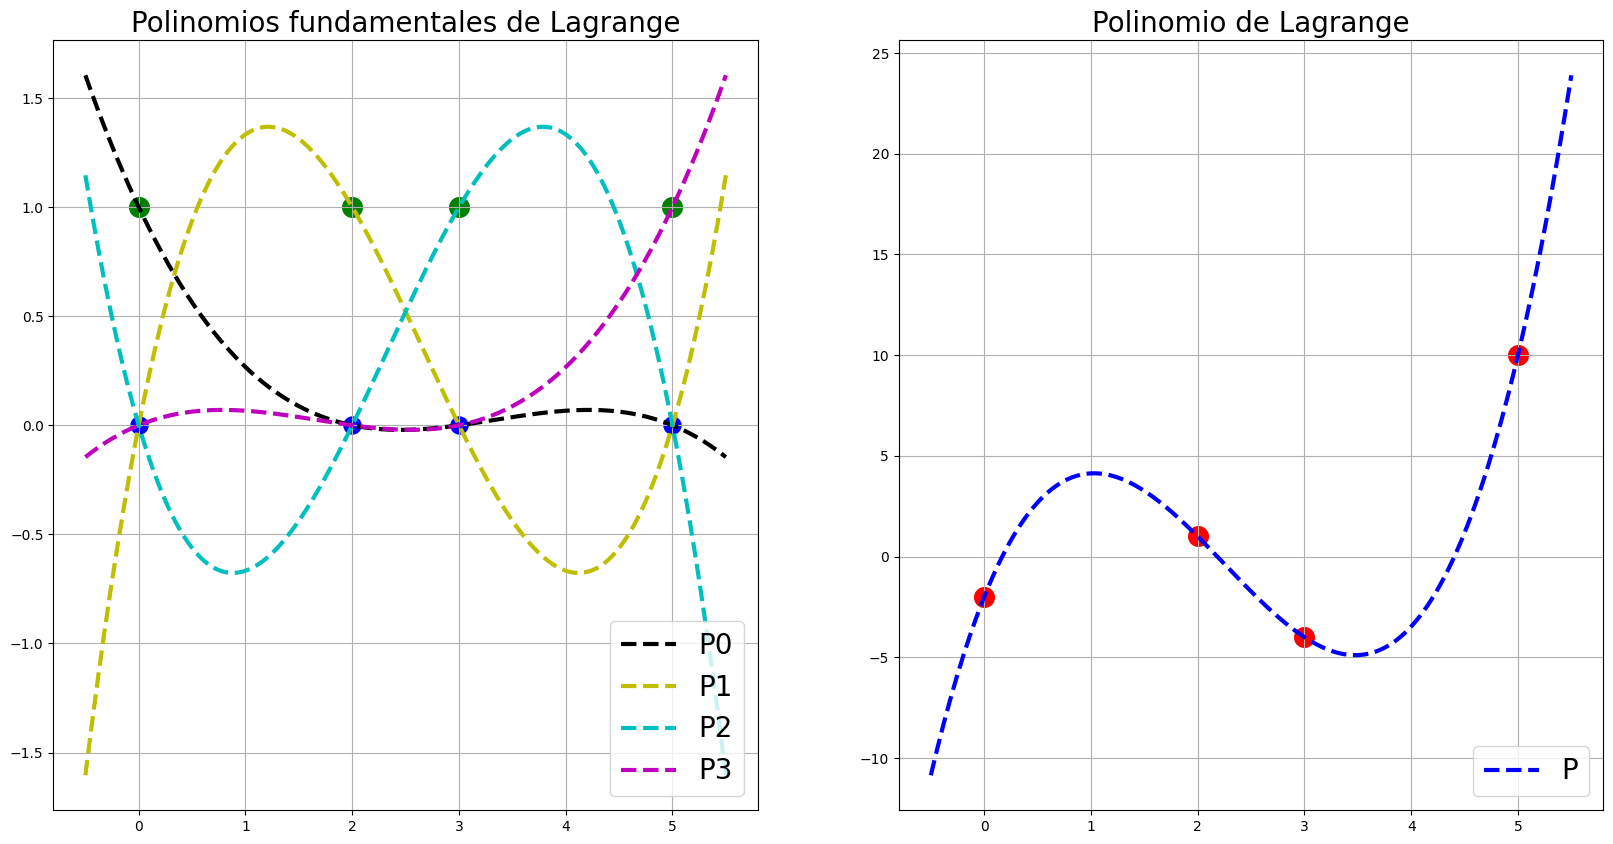

In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20,10))

# Variable simbólica sympy
x = sp.Symbol("x", real = True)

# Datos de la tabla guardados en vectores numpy
x_coef = np.array([0, 2, 3, 5])
y_coef = np.array([-2, 1, -4, 10])
n = len(x_coef)

# Creamos un polinomio con el producto completo de monomios asociados a cada punto de la tabla
numerator = sp.S('1')
for j in np.arange(n):
    numerator = numerator * (x-x_coef[j])

# Definimos las expresiones de los polinomios fundamentales y los guardamos en una lista
P_expr = [None]*n # lista de polinomios
for j in np.arange(n):
    expr = sp.simplify(numerator/(x-x_coef[j]))
    P_expr[j] = expr/expr.subs({x:x_coef[j]})

# Definimos la expresión del polinomio de Lagrange
P_lagrange = sp.S('0')
for j in np.arange(n):                      
    P_lagrange += y_coef[j]*P_expr[j] 

# Creamos funciones `lambdify` para dibujarlas
P0 = sp.lambdify(x,P_expr[0])
P1 = sp.lambdify(x,P_expr[1])
P2 = sp.lambdify(x,P_expr[2])
P3 = sp.lambdify(x,P_expr[3])

P = sp.lambdify(x,P_lagrange)

# xx: array que usaremos para dar valores a las funciones lambdify
a = x_coef[0]-0.5
b = x_coef[n-1]+0.5
xx= np.linspace(a, b, 200)

# vectores numpy donde se guardan los valores de los polinomios
P0_vec = P0(xx)
P1_vec = P1(xx)
P2_vec = P2(xx)
P3_vec = P3(xx)
P_vec = P(xx)

# Figura izquierda
ax1 = axs[0]
ax1.set_title('Polinomios fundamentales de Lagrange', fontsize=20)

y_ceros = np.zeros(n) # Para dibujar (xi,0)
ax1.scatter(x_coef, y_ceros, s=150, c='b')
y_unos = np.ones(n) # Para dibujar (xi,1)
ax1.scatter(x_coef, y_unos, s=200, c='g')
                  
ax1.plot(xx, P0_vec, c='black', ls='--', lw='3', label = 'P0')
ax1.plot(xx, P1_vec, c='y', ls='--', lw='3', label = 'P1')
ax1.plot(xx, P2_vec, c='c', ls='--', lw='3', label = 'P2')
ax1.plot(xx, P3_vec, c='m', ls='--', lw='3', label = 'P3')
ax1.grid()
ax1.legend(fontsize=20, loc='lower right')

# Figura derecha
ax2 = axs[1]
ax2.set_title("Polinomio de Lagrange", fontsize=20)
ax2.scatter(x_coef, y_coef, s=200, c='r')
ax2.plot(xx, P_vec, c='b', ls='--', lw='3', label = 'P')
ax2.grid()
ax2.legend(fontsize=20, loc='lower right')


## Construcción mediante diferencias divididas

La construcción del Polinomio de Lagrange mediante los polinomios fundamentales, que acabamos de explicar, es sencilla de entender pero difícil de implementar en la práctica. Además, si aparece un nuevo dato debemos recomenzar la construcción desde 0. 

En general, a efectos prácticos y, sobre todo, de programación, es preferible construir el polinomio de Lagrange utilizando la tabla de diferencias divididas, como explicaremos a continuación.

Antes de nada, debemos recordar que el polinomio de Lagrange es único y, por tanto, el resultado debe ser el mismo utilizando un método u otro.

* Diferencias divididas de orden 0:

    $$ 
    [y_i] \, =\, y_i \, ,\quad \forall i=0,1,\ldots,n\, .
    $$

* Diferencias divididas de orden $k$:

    $$
    [y_i,y_{i+1},\ldots,y_{i+k}] = 
    \displaystyle\frac{[y_i,y_{i+1},...,y_{i+k-1}]-[y_{i+1},...,y_{i+k}]}{x_i-x_{i+k}} , \, \forall 
    i=0,1,...,n-k \, . 
    $$


En la práctica, el cálculo de las diferencias divididas se dispone en tabla: 

$
\begin{array}{c|ccccc}
x_0 & {\color{red} y_0}  & {\color{red} [y_0 , y_1]} & {\color{red} [y_0 , y_1 , y_2]}  &  \ldots & {\color{red} [y_0,y_1,\ldots,y_n]}  \\[1ex]
x_1 & y_1  & [y_1 , y_2]  & [y_1 , y_2 , y_3] & \ldots &  \\[1ex]
x_2 & y_2  & [y_2 , y_3]  & [y_2 , y_3 , y_4] & \ldots &  \\[1ex]
\ldots & \ldots & \ldots & \ldots & \ldots &  \\[1ex]
x_{n-1} & y_{n-1}  & [y_{n-1} , y_n]  &  &  &  \\[1ex]
x_n & y_n 
\end{array}
$

Aquí nos interesa la primera fila de la matriz resultante (en rojo).  

**Fórmula de Newton:**
El polinomio de interpolación de Lagrange en los puntos $x_0,\, x_1,\ldots,\, x_n \,$ relativo a los valores $y_0,\,y_1,\ldots,\,y_n\,$ puede escribirse como

$$
\begin{array}{lcl}
p_n(x)\, &=& [y_0] \, +\, [y_0,y_1]\, (x-x_0) \, +\, [y_0,y_1,y_2]\, (x-x_0)(x-x_1) \, +  \\
         & & \ldots +\, [y_0,y_1,\ldots,y_n]\, (x-x_0)(x-x_1)\ldots(x-x_{n-1}).
\end{array}
$$

**Nota:**
Después de construir la tabla, se puede añadir un dato adicional aprovechando los cálculos ya realizados.

Vamos a hacer nuestra versión en **Numpy** del cálculo del polinomio de interpolación de Lagrange mediante la tabla de diferencias divididas. 

Ésta será la primera vez que usemos una `function`. En este caso es (casi) inevitable, ya que, en principio desconocemos el número de puntos que tomaremos como dato. Entonces, si queremos que nuestro programa valga siempre, necesitamos un bucle acumulativo para el sumatorio de la fórmula de Newton. 

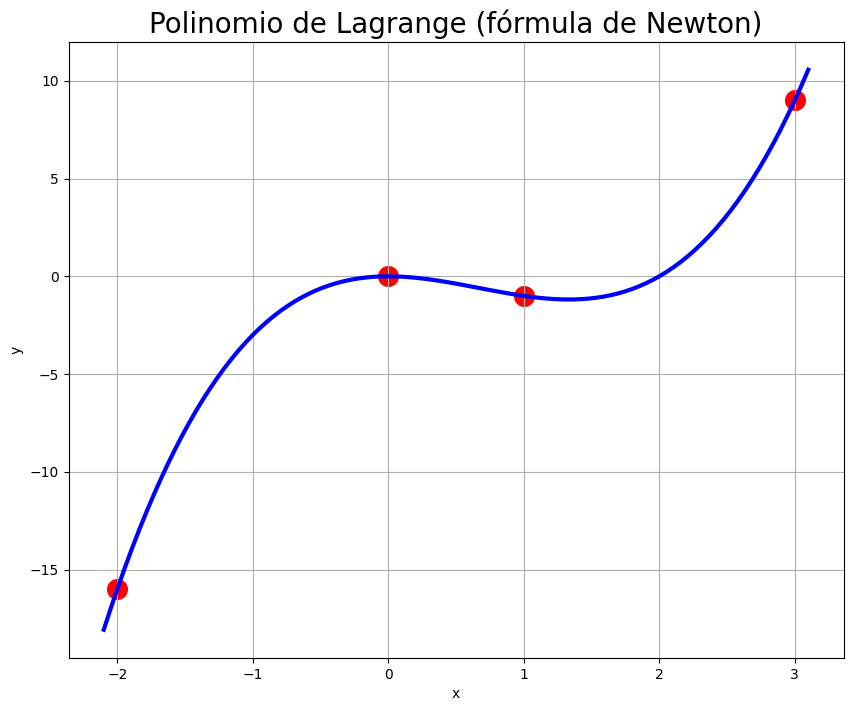

In [13]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

x = sp.Symbol("x", real = True)

x_coef = np.array([-2, 0, 1, 3])
y_coef = np.array([-16, 0, -1, 9])

n = len(x_coef)

# Almacenaremos en "tabla" la matriz de diferencias divididas
tabla = np.zeros([n, n])

# La primera columna serán los datos en y
tabla[:,0] = y_coef

# Necesitamos un doble bucle para crear el resto de "tabla"
for j in range(1,n):
    for i in range(n-j):
        tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x_coef[i+j]-x_coef[i])

# Definimos la expresión para el Polinomio de Lagrange (versión Newton)
P_expr = tabla[0,0]
multiplica = sp.S('1')
for k in range(1,n):
    multiplica = multiplica * (x - x_coef[k-1])
    P_expr = P_expr + tabla[0,k] * multiplica

# Creamos la función lambdify para dibujarla
P = sp.lambdify(x,P_expr)

xx = np.linspace(-2.1, 3.1, 200)
P_vec = P(xx)

# dibujamos el resultado
fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(xx, P_vec, 'b', lw='3')
plt.title('Polinomio de Lagrange (fórmula de Newton)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Nota:**

Hay una librería en Python, **SciPy**, en la que ya están pre-programados bastantes métodos numéricos (bueno, más bien muchos), entre ellos, por supuesto, el polinomio de Lagrange. 
Aunque en este curso no usaremos SciPy (**lo que quiere decir que NO lo admitiremos como correcto en vuestras prácticas**), os dejamos a continuación su uso con esta librería, por si os pudiera ser útil en el futuro:

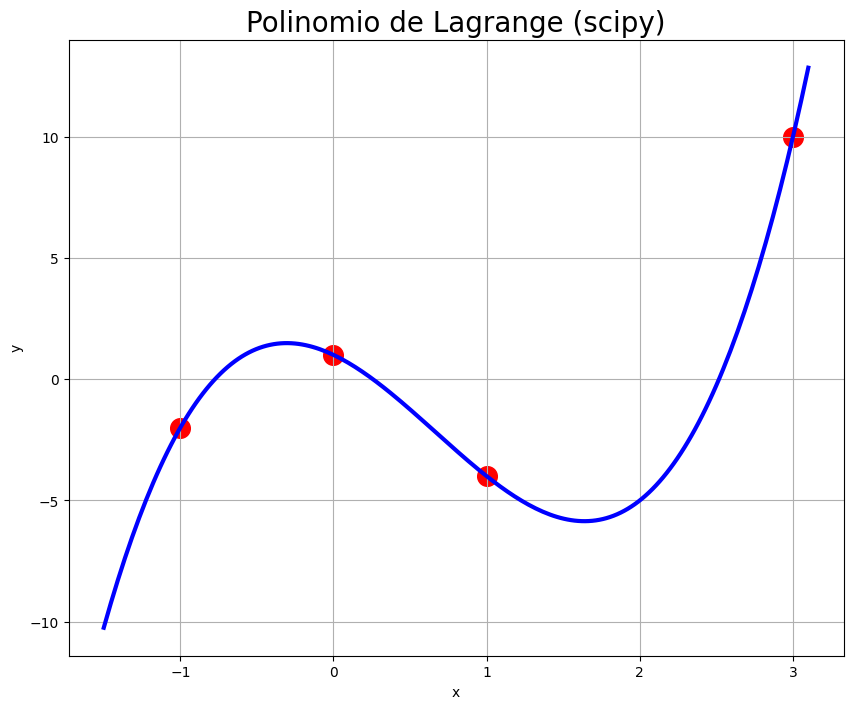

In [7]:
from scipy.interpolate import lagrange

x_coef = np.array([-1, 0, 1, 3])
y_coef = np.array([-2, 1, -4, 10])
x= np.linspace(-1.5, 3.1, 200)

pol_lag = lagrange(x_coef, y_coef)

fig = plt.figure(figsize = (10,8))
plt.scatter(x_coef, y_coef, s=200, c='r')
plt.plot(x, pol_lag(x), 'b', lw='3')
plt.title('Polinomio de Lagrange (scipy)', fontsize=20)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Links para ampliar

Aquí os dejamos algunos links, por si queréis echarles un vistazo:
* [Página sobre la construcción de Lagrange en *Python Numerical Methods*, Berkeley.](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.04-Lagrange-Polynomial-Interpolation.html)
* [Página sobre la construcción de Newton en *Python Numerical Methods*, Berkeley.](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html)
* [Entrada en la Wikipedia, construcción de Lagrange.](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Lagrange#:~:text=En%20an%C3%A1lisis%20num%C3%A9rico%2C%20el%20polinomio,por%20Leonhard%20Euler%20en%201783.)
* [Entrada en la Wikipedia, construcción de Newton.](https://es.wikipedia.org/wiki/Interpolaci%C3%B3n_polin%C3%B3mica_de_Newton)

## Ejercicios para que hagáis

**Ejercicio 1:** 

Prepara un programa para evaluar y dibujar el polinomio de Lagrange, construido mediante los monomios fundamentales, utilizando una function.  

In [8]:
# ESCRIBE AQUÍ TU CÓDIGO

**Ejercicio 2:** 

Construye un polinomio de Lagrange, mediante la tabla de diferencias divididas, para interpolar la función $\sin(x)$ en los puntos $\frac{\pi}{2}, \; 0, \; \frac{\pi}{3}, \; \frac{\pi}{2}$.

In [9]:
# ESCRIBE AQUÍ TU CÓDIGO

## Ejercicios para practicar un poco más

Para practicar un poco sobre lo que acabamos de explicar, te sugerimos que hagas (con la ayuda de Pyhton, si quieres) los siguientes ejercicios:

* https://existelimite.blogspot.com/2014/02/calculo-del-polinomio-de-interpolacion.html
* https://existelimite.blogspot.com/2016/11/aproximamos-la-funcion-seno-con-un.html
  